In [1]:
import pandas as pd
import numpy as np
import os
print(os.listdir('../Public/Downloads/'))

['all_banks.pickle', 'desktop.ini', 'Ecommerce Customers', 'Norton']


In [2]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [3]:
from pandas_datareader import data,wb

In [4]:
import pandas as pd
import numpy as np
import datetime
%matplotlib inline


In [5]:
df = pd.read_pickle('../Public/Downloads/all_banks.pickle')

In [6]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime.now()


In [7]:
start


datetime.datetime(2006, 1, 1, 0, 0)

In [8]:
end


datetime.datetime(2022, 7, 3, 17, 11, 31, 241071)

In [9]:
df.head()

Bank Ticker    BAC                                       C                \
Stock Info   Close   High    Low   Open      Volume  Close   High    Low   
Date                                                                       
2006-01-02   46.15  46.36  45.91  46.02         0.0  485.3  487.1  482.2   
2006-01-03   47.08  47.18  46.15  46.92  16197900.0  492.9  493.8  481.1   
2006-01-04   46.58  47.24  46.45  47.00  17427400.0  483.8  491.0  483.5   
2006-01-05   46.64  46.83  46.32  46.58  14668900.0  486.2  487.8  484.0   
2006-01-06   46.57  46.91  46.35  46.80  11965700.0  486.2  489.0  482.0   

Bank Ticker                    ...       MS                             \
Stock Info    Open     Volume  ...    Close     High      Low     Open   
Date                           ...                                       
2006-01-02   483.5        0.0  ...  47.1008  47.3333  46.7107  47.2751   
2006-01-03   490.0  1536700.0  ...  48.4041  48.5535  47.1008  47.4578   
2006-01-04   488.6  1852790.0  ...  48.4373  49.2093  48.4373  48.7278   
2006-01-05   484.4  1015470.0  ...  48.5701  48.6365  48.1634  48.6033   
2006-01-06   488.8  1358930.0  ...  48.6199  48.8524  48.1883  48.7860   

Bank Ticker                WFC                                      
Stock Info      Volume   Close    High     Low    Open      Volume  
Date                                                                
2006-01-02         0.0  31.415  31.535  31.215  31.415         0.0  
2006-01-03   6354408.0  31.900  31.975  31.195  31.600  11015000.0  
2006-01-04   9292188.0  31.530  31.820  31.365  31.800  10594000.0  
2006-01-05   6534262.0  31.495  31.555  31.310  31.500   9927600.0  
2006-01-06   8146445.0  31.680  31.775  31.385  31.580   8324000.0  

[5 rows x 30 columns]

In [10]:
df.shape
df['C']['Close']

Date
2006-01-02    485.30
2006-01-03    492.90
2006-01-04    483.80
2006-01-05    486.20
2006-01-06    486.20
               ...  
2018-04-24     69.12
2018-04-25     69.36
2018-04-26     69.18
2018-04-27     68.99
2018-04-30     68.27
Name: Close, Length: 3216, dtype: float64

In [11]:
dataf=df.xs(key='Close',axis=1,level='Stock Info')

In [12]:
dataf.columns


Index(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'], dtype='object', name='Bank Ticker')

In [13]:
df.xs(key='Close', axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.9000
C      564.1000
GS     273.3800
JPM    118.7700
MS      74.1294
WFC     65.9300
dtype: float64

In [14]:
returns = pd.DataFrame()

In [15]:
WC = ['BAC','C','GS','JPM','MS','WFC']

In [16]:
for w in WC:
    returns[w+' '+' RET'] = df[w]['Close'].pct_change()
returns

,BAC RET,C RET,GS RET,JPM RET,MS RET,WFC RET
Date,,,,,,
2006-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-03,0.020152,0.015660,0.009083,0.012598,0.027670,0.015438
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
...,...,...,...,...,...,...
2018-04-24,-0.004288,-0.005181,-0.016946,-0.004688,-0.010626,-0.001901
2018-04-25,-0.001656,0.003472,-0.013444,-0.003804,-0.019408,0.011426
2018-04-26,-0.002322,-0.002595,0.003595,0.001000,0.003075,-0.012615


In [17]:
import seaborn as sns

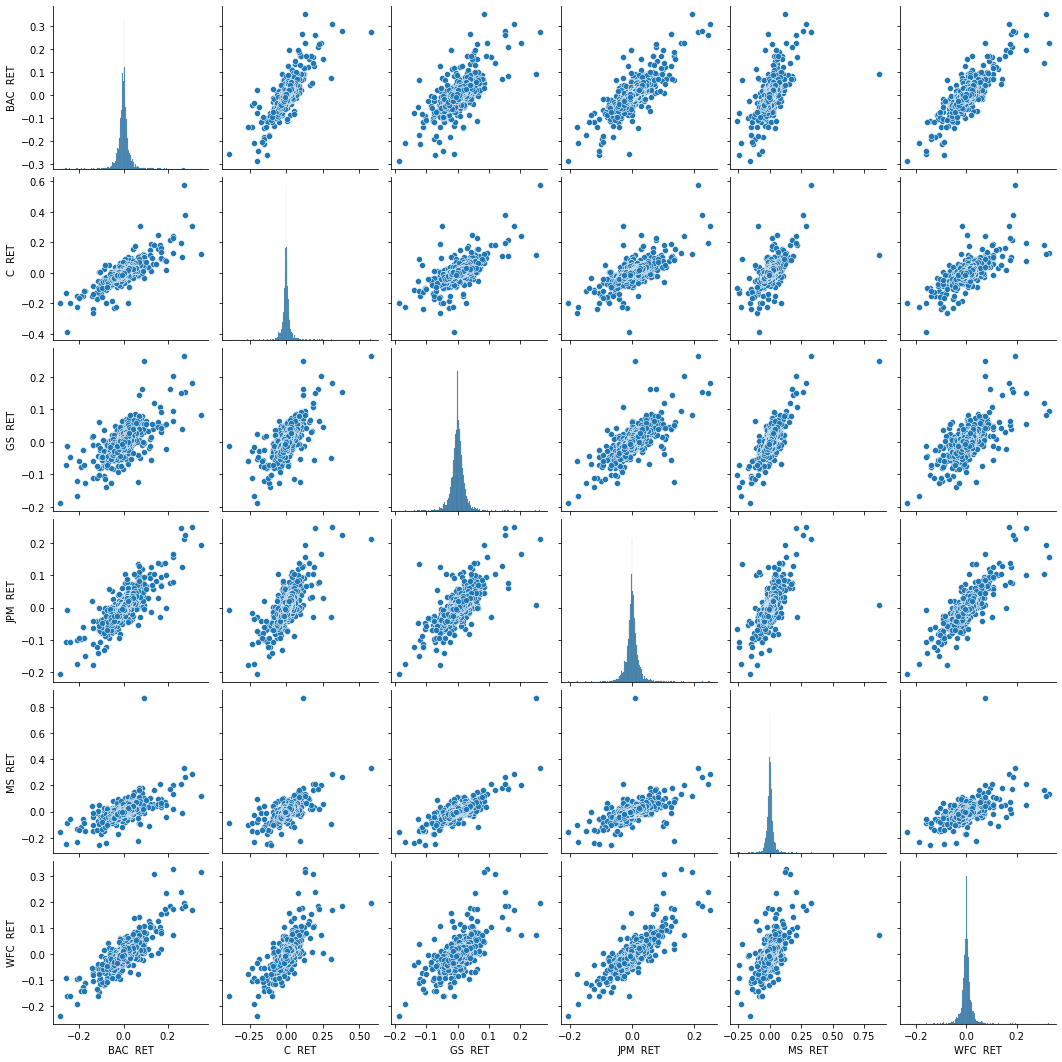

In [18]:
sns.pairplot(returns[1:])

In [19]:
returns.idxmin()

BAC  RET   2009-01-20
C  RET     2009-02-27
GS  RET    2009-01-20
JPM  RET   2009-01-20
MS  RET    2008-10-09
WFC  RET   2009-01-20
dtype: datetime64[ns]

In [20]:
returns.idxmax()

BAC  RET   2009-04-09
C  RET     2008-11-24
GS  RET    2008-11-24
JPM  RET   2009-01-21
MS  RET    2008-10-13
WFC  RET   2008-07-16
dtype: datetime64[ns]

In [21]:
a=returns['C  RET']


In [22]:
import matplotlib.pyplot as plt

In [23]:
type(a)

pandas.core.series.Series

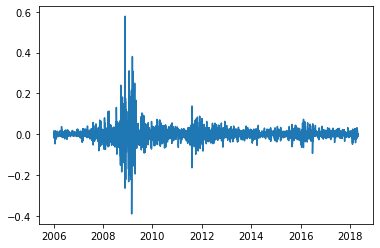

In [24]:
plt.plot(a)

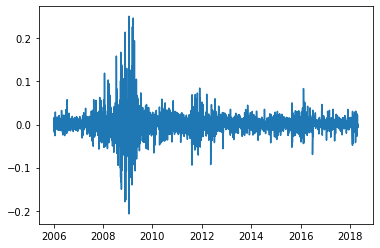

In [25]:
b=returns['JPM  RET']
plt.plot(b)

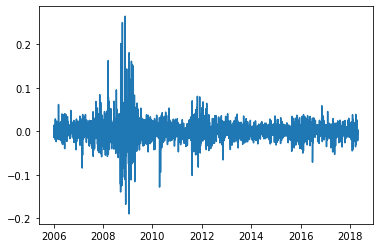

In [26]:
c=returns['GS  RET']
plt.plot(c)

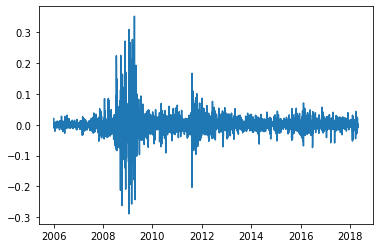

In [27]:
d=returns['BAC  RET']
plt.plot(d)

In [28]:
returns.std()

BAC  RET    0.033231
C  RET      0.034890
GS  RET     0.023393
JPM  RET    0.025190
MS  RET     0.034188
WFC  RET    0.027405
dtype: float64

In [29]:
f = returns.loc['2017-05-01':'2018-04-30']
g= returns.iloc[0:100]

In [30]:
f.std()

BAC  RET    0.013895
C  RET      0.012122
GS  RET     0.013769
JPM  RET    0.011600
MS  RET     0.014062
WFC  RET    0.012877
dtype: float64

In [31]:
g

,BAC RET,C RET,GS RET,JPM RET,MS RET,WFC RET
Date,,,,,,
2006-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-03,0.020152,0.015660,0.009083,0.012598,0.027670,0.015438
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
...,...,...,...,...,...,...
2006-05-15,0.007114,0.010614,-0.019025,0.004964,-0.019277,0.007445
2006-05-16,0.001816,0.000606,-0.002873,-0.004939,-0.000161,0.003843
2006-05-17,-0.021757,-0.014332,-0.029404,-0.024143,-0.033354,-0.021349


<AxesSubplot:xlabel='MS  RET', ylabel='Count'>

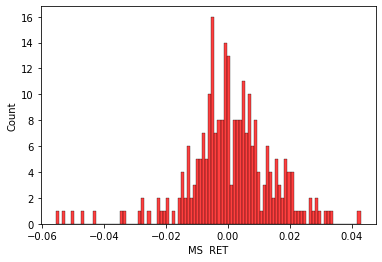

In [32]:
sns.histplot(f['MS  RET'],color='red',bins=100)

Distplot is plotted and analysed


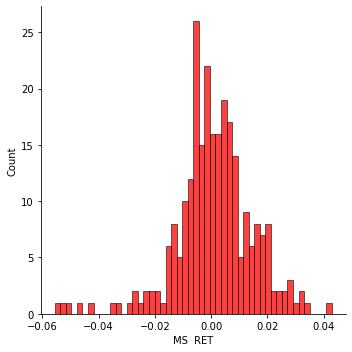

In [33]:
sns.displot(f['MS  RET'],color='red',bins=50)

In [34]:
g= returns.loc['2008-01-01':'2008-12-31']

C:\Users\HP\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='C  RET', ylabel='Density'>

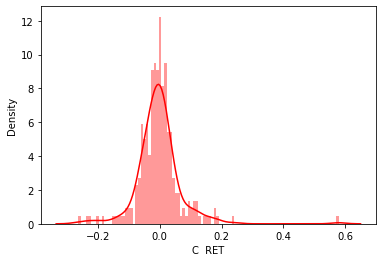

In [35]:
sns.distplot(g['C  RET'],color='red',bins=100)

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline



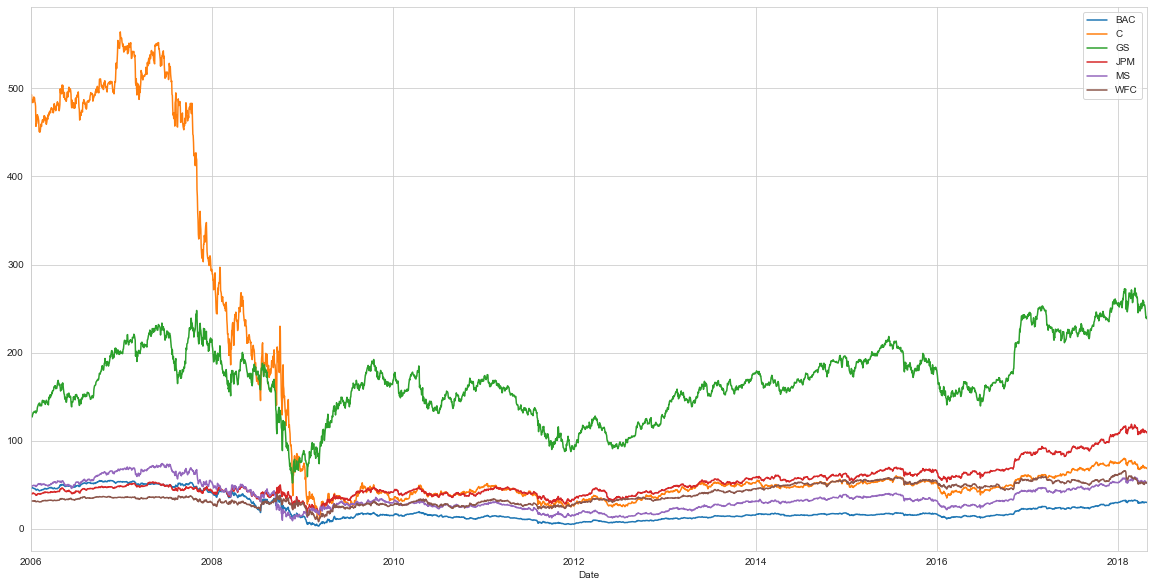

In [37]:
WC = ['BAC','C','GS','JPM','MS','WFC']
for w in WC:
    df[w]['Close'].plot(figsize=(20,10),label=w)
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


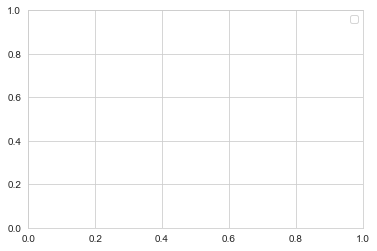

In [38]:
plt.legend()

<AxesSubplot:xlabel='Date'>

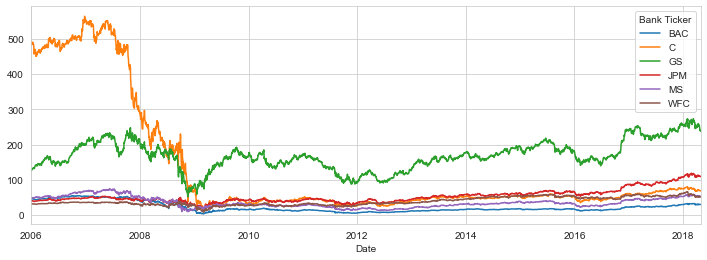

In [39]:
df.xs(key='Close',axis=1,level='Stock Info').plot(figsize=(12,4))

In [40]:
df

Bank Ticker    BAC                                        C            \
Stock Info   Close   High    Low   Open      Volume   Close      High   
Date                                                                    
2006-01-02   46.15  46.36  45.91  46.02         0.0  485.30  487.1000   
2006-01-03   47.08  47.18  46.15  46.92  16197900.0  492.90  493.8000   
2006-01-04   46.58  47.24  46.45  47.00  17427400.0  483.80  491.0000   
2006-01-05   46.64  46.83  46.32  46.58  14668900.0  486.20  487.8000   
2006-01-06   46.57  46.91  46.35  46.80  11965700.0  486.20  489.0000   
...            ...    ...    ...    ...         ...     ...       ...   
2018-04-24   30.19  30.86  30.00  30.46  81486781.0   69.12   70.6200   
2018-04-25   30.14  30.34  29.80  30.09  65893478.0   69.36   69.7650   
2018-04-26   30.07  30.28  29.99  30.04  45936713.0   69.18   69.5900   
2018-04-27   30.15  30.21  29.97  29.99  47411234.0   68.99   69.4377   
2018-04-30   29.92  30.43  29.92  30.27  55153947.0   68.27   69.5900   

Bank Ticker                                ...       MS                    \
Stock Info        Low    Open      Volume  ...    Close     High      Low   
Date                                       ...                              
2006-01-02   482.2000  483.50         0.0  ...  47.1008  47.3333  46.7107   
2006-01-03   481.1000  490.00   1536700.0  ...  48.4041  48.5535  47.1008   
2006-01-04   483.5000  488.60   1852790.0  ...  48.4373  49.2093  48.4373   
2006-01-05   484.0000  484.40   1015470.0  ...  48.5701  48.6365  48.1634   
2006-01-06   482.0000  488.80   1358930.0  ...  48.6199  48.8524  48.1883   
...               ...     ...         ...  ...      ...      ...      ...   
2018-04-24    68.4001   69.76  16233650.0  ...  53.0700  54.6150  52.4350   
2018-04-25    68.0500   68.77  16059671.0  ...  52.0400  52.8700  51.8200   
2018-04-26    68.9000   69.11  13829682.0  ...  52.2000  52.6000  51.6700   
2018-04-27    68.7400   69.00  10420057.0  ...  51.8600  52.5100  51.7800   
2018-04-30    68.2500   69.20  12237893.0  ...  51.6200  52.5000  51.5800   

Bank Ticker                          WFC                                      
Stock Info      Open      Volume   Close    High     Low    Open      Volume  
Date                                                                          
2006-01-02   47.2751         0.0  31.415  31.535  31.215  31.415         0.0  
2006-01-03   47.4578   6354408.0  31.900  31.975  31.195  31.600  11015000.0  
2006-01-04   48.7278   9292188.0  31.530  31.820  31.365  31.800  10594000.0  
2006-01-05   48.6033   6534262.0  31.495  31.555  31.310  31.500   9927600.0  
2006-01-06   48.7860   8146445.0  31.680  31.775  31.385  31.580   8324000.0  
...              ...         ...     ...     ...     ...     ...         ...  
2018-04-24   53.9600  10742663.0  52.510  53.745  52.180  52.950  23052062.0  
2018-04-25   52.8500  12622985.0  53.110  53.490  51.925  52.440  20978459.0  
2018-04-26   52.0100  14668929.0  52.440  53.110  52.255  52.990  17025831.0  
2018-04-27   51.8400   7784472.0  52.360  52.940  52.205  52.280  12304308.0  
2018-04-30   52.1800   8209733.0  51.960  53.050  51.960  52.560  17050544.0  

[3216 rows x 30 columns]

In [41]:
d = df.xs(key='BAC',axis=1,level='Bank Ticker').iloc[:100,0:4]
d.iplot(kind='candle')

AttributeError: 'DataFrame' object has no attribute 'iplot'

<AxesSubplot:xlabel='Date'>

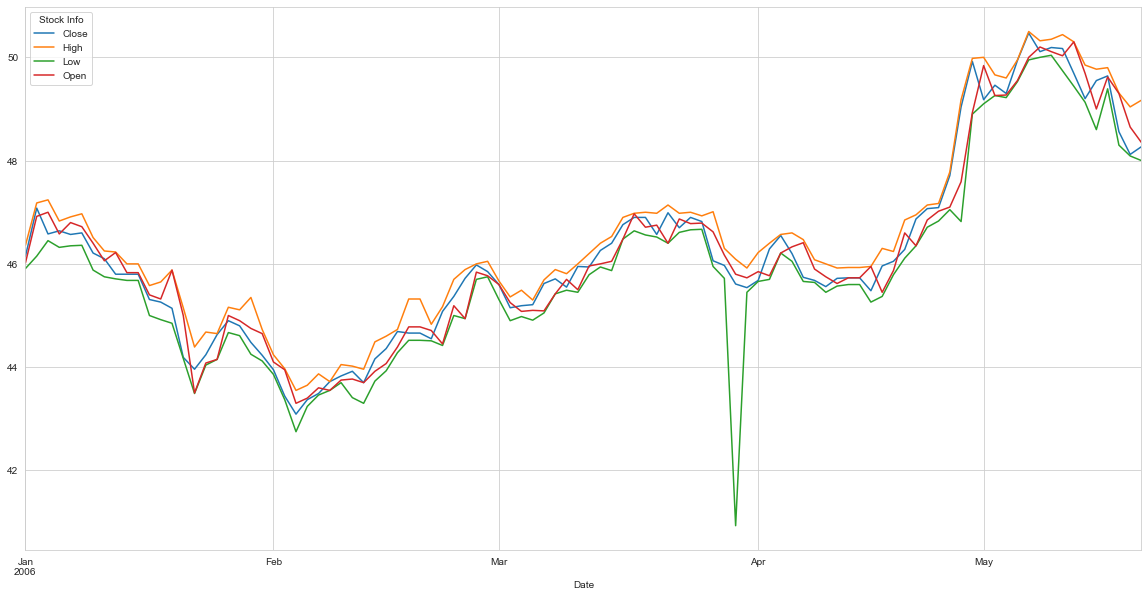

In [42]:
d.plot(figsize=(20,10))

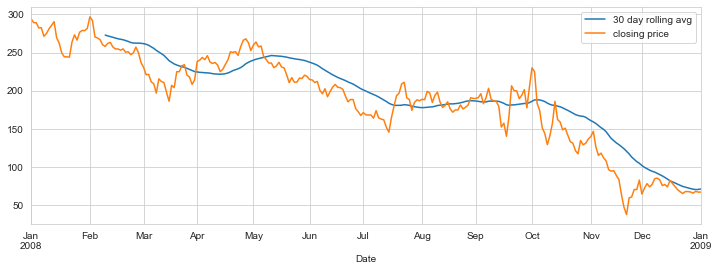

In [43]:
plt.figure(figsize=(12,4))
df['C']['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 day rolling avg')
df['C']['Close'].loc['2008-01-01':'2009-01-01'].plot(label='closing price')
plt.legend()

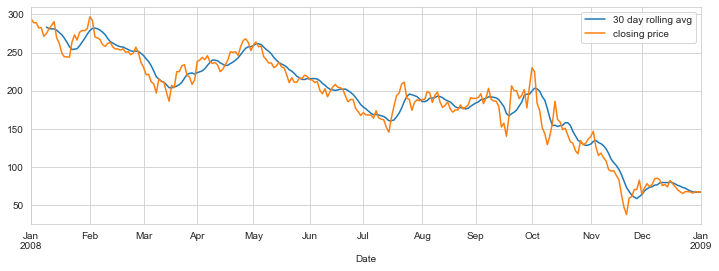

In [44]:
plt.figure(figsize=(12,4))
df['C']['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=7).mean().plot(label='30 day rolling avg')
df['C']['Close'].loc['2008-01-01':'2009-01-01'].plot(label='closing price')
plt.legend()

In [45]:
df.xs(key='Close',axis=1,level='Stock Info').iplot()

AttributeError: 'DataFrame' object has no attribute 'iplot'

In [46]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [47]:
import plotly

In [48]:
import plotly
import cufflinks as cf
cf.go_offline()

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

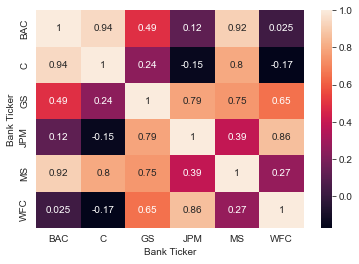

In [49]:
sns.heatmap(df.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

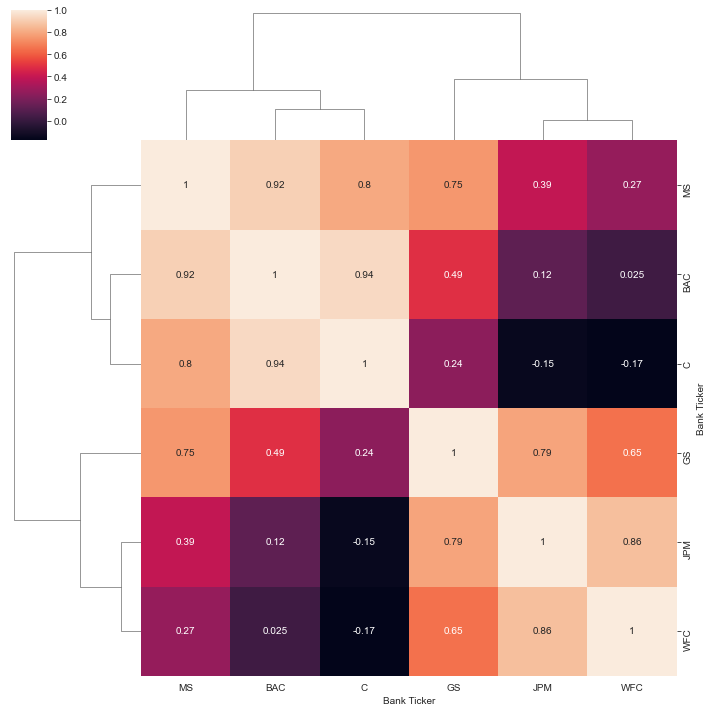

In [50]:
sns.clustermap(df.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [51]:
df['C']['Close'].loc['2017-01-01':'2018-01-01'].ta_plot(study='boll')